In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load the dataset 
df = pd.read_csv('/Users/dhanushadurukatla/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first few rows to ensure it's loaded correctly 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
# Check the shape (rows, columns) of the DataFrame 
print(f"Dataset shape: {df.shape}")

# Check for any duplicated rows 
print(f"Number of duplicated data: {df.duplicated().sum()}")

# Check for missing values in each column 
print("Missing values per column:")
print(df.isnull().sum())

# Check the data types of the columns 
print("\nColumn data types:")
df.dtypes

Dataset shape: (1470, 35)
Number of duplicated data: 0
Missing values per column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance   

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Attrition Rate:
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


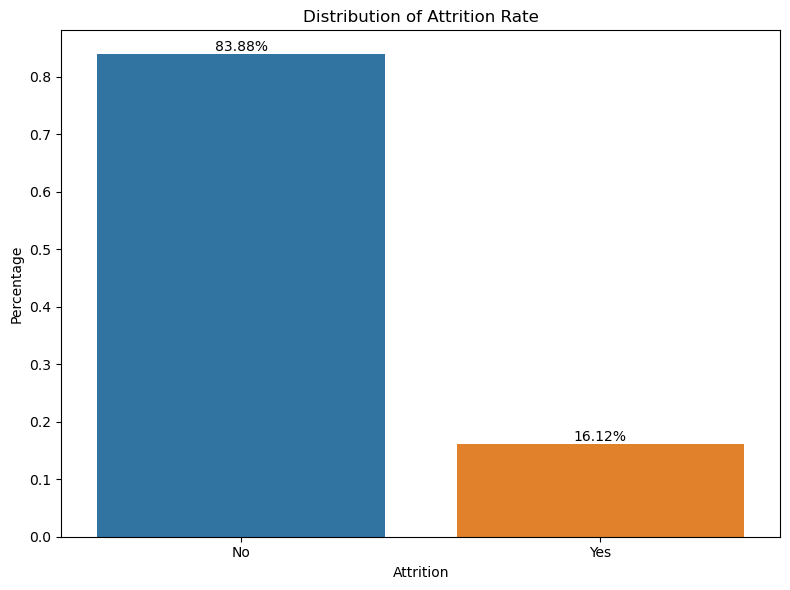

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your DataFrame 'df' is loaded correctly before this step
# df = pd.read_csv('path/to/your/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Calculate the attrition rate
attrition_rate_series = df['Attrition'].value_counts(normalize=True)

# --- FIX APPLIED HERE ---
# Convert the Series to a DataFrame for easier plotting
attrition_rate_df = attrition_rate_series.reset_index()
attrition_rate_df.columns = ['Attrition', 'Percentage'] # Rename columns for clarity

print("Attrition Rate:")
print(attrition_rate_series)

# Visualize the distribution of the attrition rate
plt.figure(figsize=(8, 6))

# Use the new DataFrame and specify columns for x and y
ax = sns.barplot(data=attrition_rate_df, x='Attrition', y='Percentage')

# Add percentage labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.2f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title('Distribution of Attrition Rate')
plt.xlabel('Attrition')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

In [10]:
# Calculate the average years at the company 
avg_tenure = df['YearsAtCompany'].mean()

print(f'Average years of employee tenure is {avg_tenure:.2f} years')

Average years of employee tenure is 7.01 years


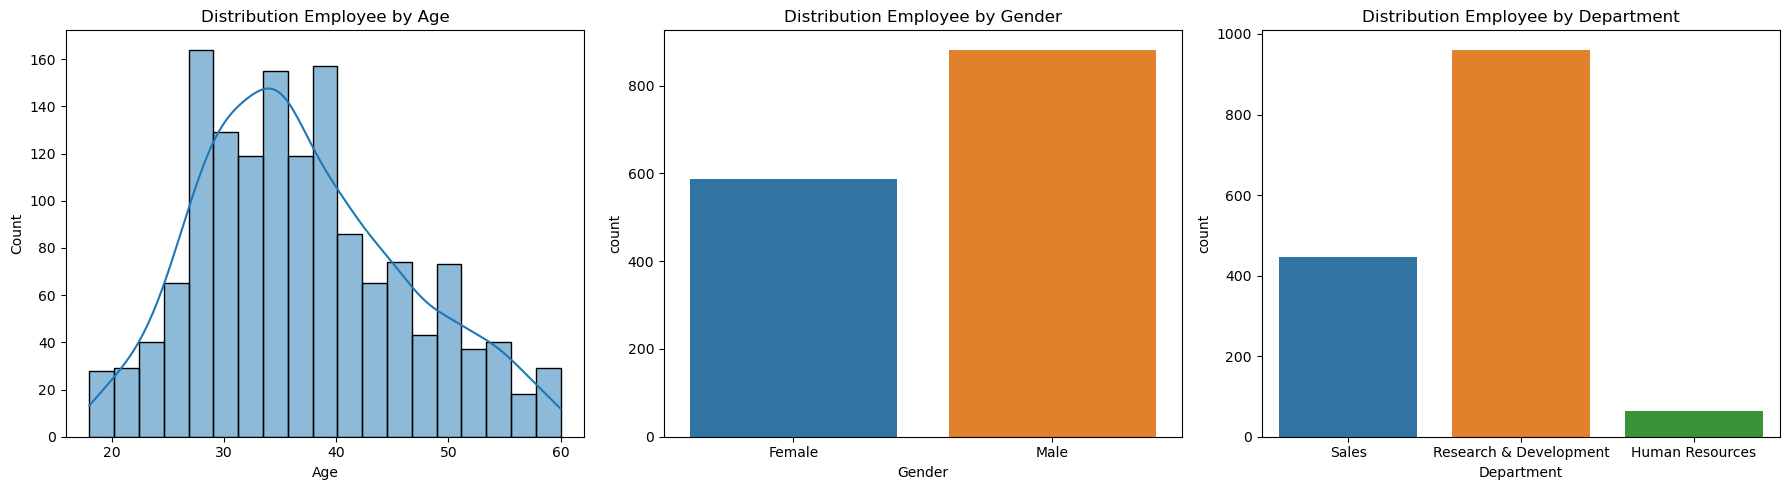

In [11]:
# Create subplots for the three charts 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Plot 1: Distribution of Employee by Age 
sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Distribution Employee by Age')

# Plot 2: Distribution of Employee by Gender 
sns.countplot(data=df, x='Gender', ax=axes[1])
axes[1].set_title('Distribution Employee by Gender')

# Plot 3: Distribution of Employee by Department 
sns.countplot(data=df, x='Department', ax=axes[2])
axes[2].set_title('Distribution Employee by Department')

plt.tight_layout()
plt.show()

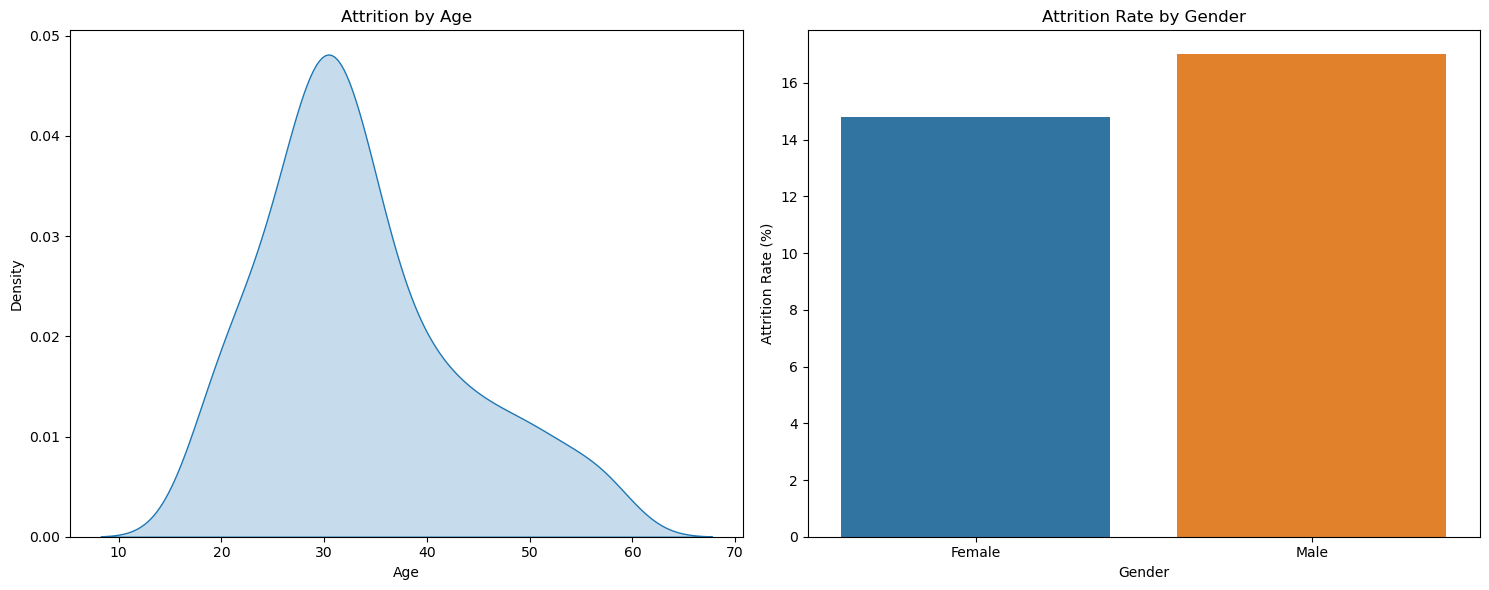

In [12]:
# Create a DataFrame containing only employees who have left 
df_attrition = df[df['Attrition'] == 'Yes']

# Set up the plots 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot 1: KDE plot of Age for employees who left 
sns.kdeplot(data=df_attrition, x='Age', fill=True, ax=axes[0])
axes[0].set_title('Attrition by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

# --- For Attrition Rate by Gender, we need a helper function ---
# This function calculates the attrition rate for any given column 
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = (attrition_counts['Yes'] / attrition_counts.sum(axis=1)) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

# Calculate attrition rate by gender 
attrition_rate_gender = calculate_attrition_rate(df, 'Gender')

# Plot 2: Bar plot of Attrition Rate by Gender 
sns.barplot(data=attrition_rate_gender, x='Gender', y='AttritionRate', ax=axes[1])
axes[1].set_title('Attrition Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

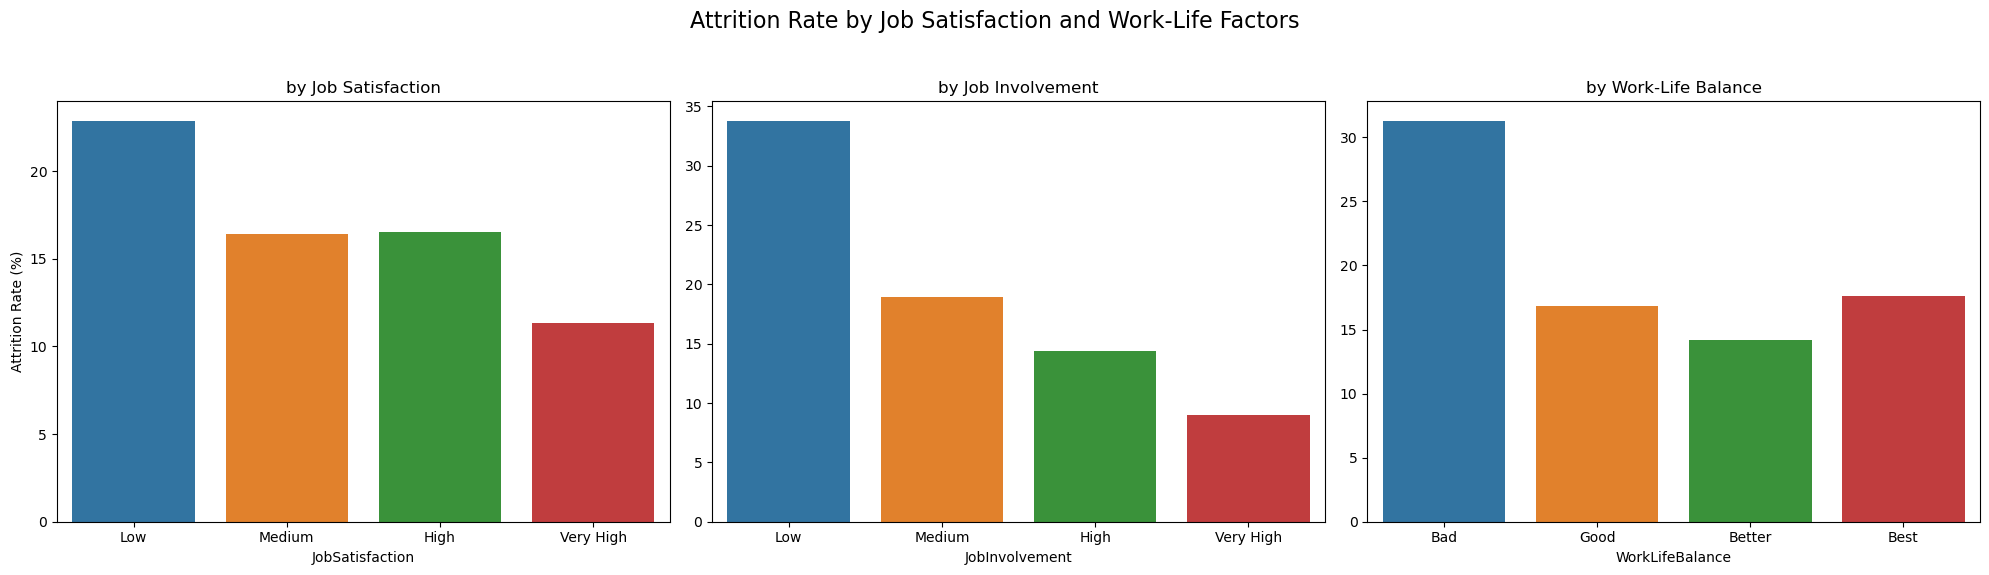

In [13]:
# We will reuse the attrition rate calculation function from before
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = (attrition_counts['Yes'] / attrition_counts.sum(axis=1)) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

# --- Create plots for each factor ---
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Attrition Rate by Job Satisfaction and Work-Life Factors', fontsize=16)

# Plot 1: Attrition Rate by JobSatisfaction
satisfaction_rate = calculate_attrition_rate(df, 'JobSatisfaction')
# Map numeric values to labels for better readability as described in the PDF
satisfaction_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
satisfaction_rate['JobSatisfaction'] = satisfaction_rate['JobSatisfaction'].map(satisfaction_map)
sns.barplot(data=satisfaction_rate, x='JobSatisfaction', y='AttritionRate', ax=axes[0], order=['Low', 'Medium', 'High', 'Very High'])
axes[0].set_title('by Job Satisfaction')
axes[0].set_ylabel('Attrition Rate (%)')

# Plot 2: Attrition Rate by JobInvolvement
involvement_rate = calculate_attrition_rate(df, 'JobInvolvement')
involvement_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
involvement_rate['JobInvolvement'] = involvement_rate['JobInvolvement'].map(involvement_map)
sns.barplot(data=involvement_rate, x='JobInvolvement', y='AttritionRate', ax=axes[1], order=['Low', 'Medium', 'High', 'Very High'])
axes[1].set_title('by Job Involvement')
axes[1].set_ylabel('') # Hide y-label for cleaner look

# Plot 3: Attrition Rate by WorkLifeBalance
worklife_rate = calculate_attrition_rate(df, 'WorkLifeBalance')
worklife_map = {1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
worklife_rate['WorkLifeBalance'] = worklife_rate['WorkLifeBalance'].map(worklife_map)
sns.barplot(data=worklife_rate, x='WorkLifeBalance', y='AttritionRate', ax=axes[2], order=['Bad', 'Good', 'Better', 'Best'])
axes[2].set_title('by Work-Life Balance')
axes[2].set_ylabel('') # Hide y-label

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

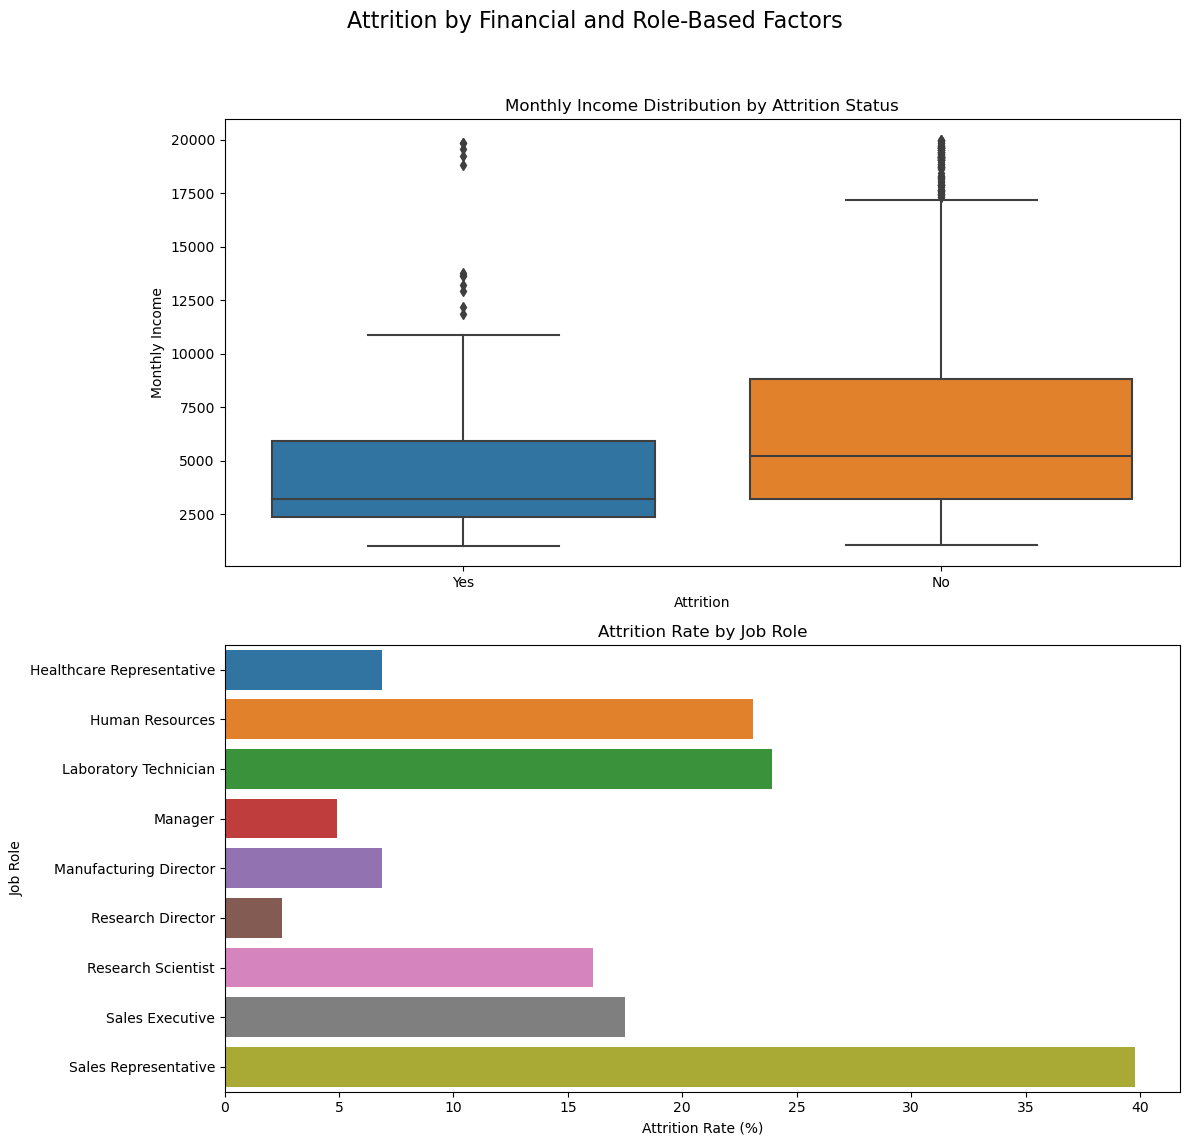

In [14]:
# --- Create plots for financial and role-based factors ---
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
fig.suptitle('Attrition by Financial and Role-Based Factors', fontsize=16)

# Plot 1: Distribution of Monthly Income by Attrition
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax=axes[0])
axes[0].set_title('Monthly Income Distribution by Attrition Status')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Monthly Income')

# Plot 2: Attrition Rate by Job Role
# We reuse the calculate_attrition_rate function from before
job_role_rate = calculate_attrition_rate(df, 'JobRole')
sns.barplot(data=job_role_rate, x='AttritionRate', y='JobRole', ax=axes[1], orient='h')
axes[1].set_title('Attrition Rate by Job Role')
axes[1].set_xlabel('Attrition Rate (%)')
axes[1].set_ylabel('Job Role')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

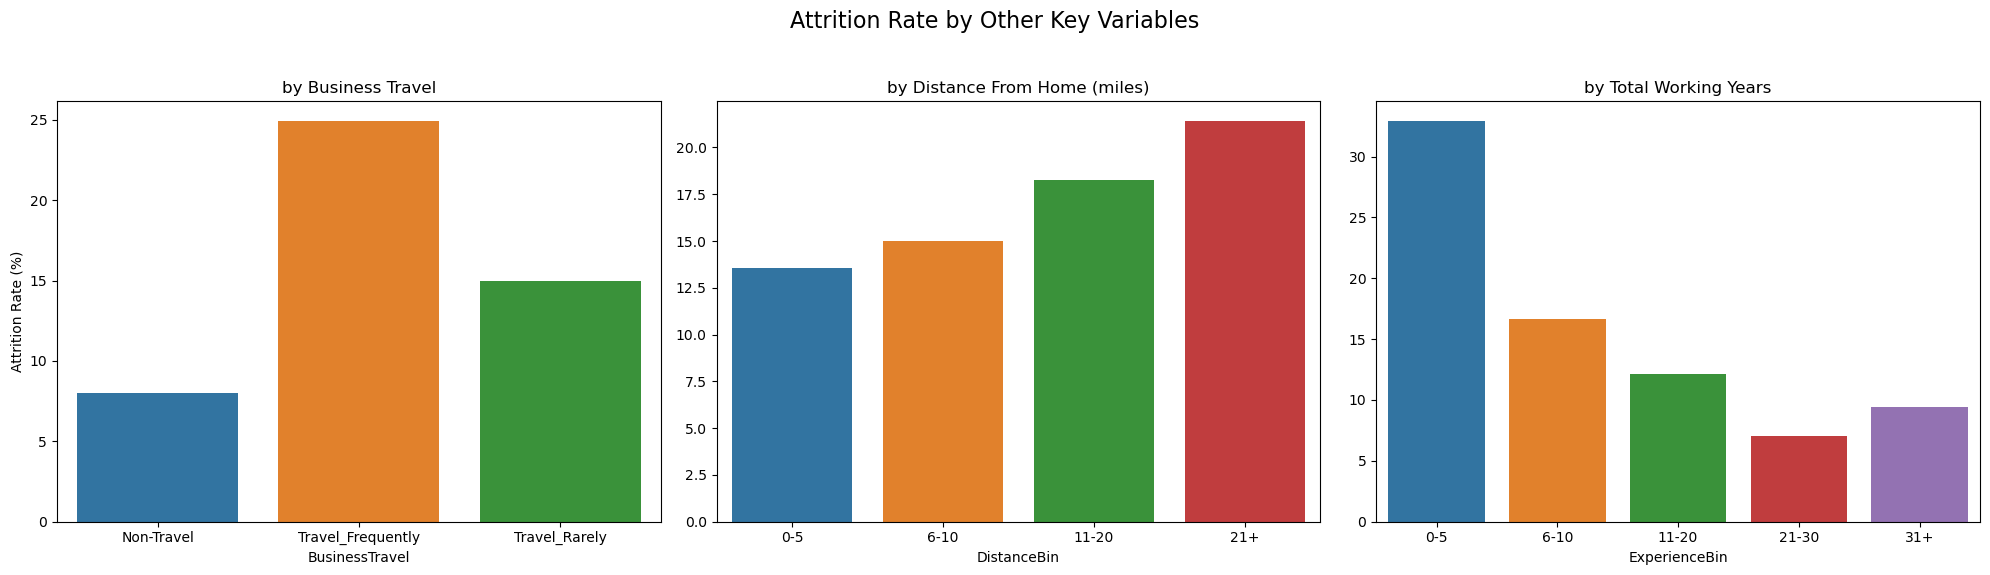

In [15]:
# We will reuse the attrition rate calculation function
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = (attrition_counts['Yes'] / attrition_counts.sum(axis=1)) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

# --- Create plots for each factor ---
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Attrition Rate by Other Key Variables', fontsize=16)

# Plot 1: Attrition Rate by BusinessTravel
travel_rate = calculate_attrition_rate(df, 'BusinessTravel')
sns.barplot(data=travel_rate, x='BusinessTravel', y='AttritionRate', ax=axes[0])
axes[0].set_title('by Business Travel')
axes[0].set_ylabel('Attrition Rate (%)')

# Plot 2: Attrition Rate by DistanceFromHome (binned for clarity)
# We create bins to group distances together
bins = [0, 5, 10, 20, 30]
labels = ['0-5', '6-10', '11-20', '21+']
df['DistanceBin'] = pd.cut(df['DistanceFromHome'], bins=bins, labels=labels, right=False)
distance_rate = calculate_attrition_rate(df, 'DistanceBin')
sns.barplot(data=distance_rate, x='DistanceBin', y='AttritionRate', ax=axes[1])
axes[1].set_title('by Distance From Home (miles)')
axes[1].set_ylabel('')

# Plot 3: Attrition Rate by TotalWorkingYears (binned for clarity)
bins = [0, 5, 10, 20, 30, 45]
labels = ['0-5', '6-10', '11-20', '21-30', '31+']
df['ExperienceBin'] = pd.cut(df['TotalWorkingYears'], bins=bins, labels=labels, right=False)
experience_rate = calculate_attrition_rate(df, 'ExperienceBin')
sns.barplot(data=experience_rate, x='ExperienceBin', y='AttritionRate', ax=axes[2])
axes[2].set_title('by Total Working Years')
axes[2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Model Accuracy: 85.71%

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.86      0.99      0.92       247
        Left       0.78      0.15      0.25        47

    accuracy                           0.86       294
   macro avg       0.82      0.57      0.59       294
weighted avg       0.85      0.86      0.81       294


Confusion Matrix:


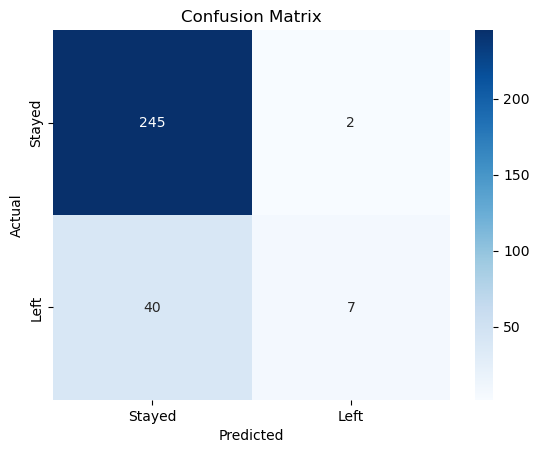

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# --- 1. Prepare the Data ---

# Create a fresh copy of the original dataframe to avoid using the binned columns from the last step
df_model = df.drop(columns=['DistanceBin', 'ExperienceBin'])

# Convert the target variable 'Attrition' to numeric (Yes=1, No=0)
df_model['Attrition'] = df_model['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert all other object columns to numeric using Label Encoding
for column in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[column] = le.fit_transform(df_model[column])

# Define features (X) and target (y)
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

# --- 2. Split the Data ---

# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 3. Train a Logistic Regression Model ---
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# --- 4. Evaluate the Model ---

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")

# Display a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Stayed', 'Left']))

# Display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# (This code should be run after you have trained the model in Step 8)
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# --- Re-run model training steps to ensure we have the model object ---
df_model = df.copy().drop(columns=['DistanceBin', 'ExperienceBin'], errors='ignore')
df_model['Attrition'] = df_model['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
for column in df_model.select_dtypes(include='object').columns:
    df_model[column] = LabelEncoder().fit_transform(df_model[column])
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# --- Save the trained model to a file ---
joblib.dump(model, 'attrition_model.joblib')

print("Model saved successfully as attrition_model.joblib")

Model saved successfully as attrition_model.joblib


In [18]:
pip install streamlit

  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/13/e6/69fcbae3dd2fcb2f54283a7cbe03c8b944b79997f1b526984f91d4796a02/streamlit-1.45.1-py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/aa/f3/0b6ced594e51cc95d8c1fc1640d3623770d01e4969d29c0bd09945fafefa/altair-5.5.0-py3-none-any.whl.metadata
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/1d/9a/4114a9057db2f1462d5c8f8390ab7383925fe1ac012eaa42402ad65c2963/GitPython-3.1.44-py3-none-any.whl.metadata
  Using cached GitPython-3.1.44-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for pydeck<1,>=0.8.0b4 from https://files.pythonhosted.org/packages/ab/4c/b888e6cf58bd9db9c93f40d1c6be8283ff49d88919231afe93a6bcf61626/pydeck-0.9.1-py2.py3-none-any.whl.metadata
  Using cached pydeck-0.9.1

In [19]:
# app.py
import streamlit as st
import pandas as pd
import joblib

# Load the pre-trained model
model = joblib.load('attrition_model.joblib')

# --- Create the UI of the App ---

st.title('Employee Attrition Prediction App')
st.write('This app predicts the likelihood of an employee leaving the company.')
st.write('Please enter the employee\'s details below to get a prediction.')

# Create input fields for the features used by the model
# We will create dropdowns for categorical features and number inputs for numerical ones.
# The options for dropdowns should match the data the model was trained on.

st.header('Employee Details')

# Categorical Inputs
business_travel = st.selectbox('Business Travel', ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'])
department = st.selectbox('Department', ['Human Resources', 'Research & Development', 'Sales'])
education_field = st.selectbox('Education Field', ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree'])
gender = st.selectbox('Gender', ['Female', 'Male'])
job_role = st.selectbox('Job Role', ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative'])
marital_status = st.selectbox('Marital Status', ['Divorced', 'Married', 'Single'])
over_time = st.selectbox('Over Time', ['No', 'Yes'])

# Numerical Inputs
age = st.slider('Age', 18, 60, 35)
daily_rate = st.slider('Daily Rate', 100, 1500, 800)
distance_from_home = st.slider('Distance From Home (miles)', 1, 30, 10)
job_satisfaction = st.slider('Job Satisfaction (1-4)', 1, 4, 3)
monthly_income = st.slider('Monthly Income ($)', 1000, 20000, 6500)
total_working_years = st.slider('Total Working Years', 0, 40, 10)
years_at_company = st.slider('Years at Company', 0, 40, 7)
years_with_curr_manager = st.slider('Years with Current Manager', 0, 20, 4)

# --- Prediction Logic ---
if st.button('Predict Attrition'):
    # Prepare the input data for the model
    # The model expects a DataFrame with the same columns and encoding as the training data
    
    # Create a dictionary for the LabelEncoders (this is a simplified approach)
    # In a real-world scenario, you would save and load the fitted encoders
    encoding_maps = {
        'BusinessTravel': {'Non-Travel': 0, 'Travel_Rarely': 2, 'Travel_Frequently': 1},
        'Department': {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2},
        'EducationField': {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5},
        'Gender': {'Female': 0, 'Male': 1},
        'JobRole': {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8},
        'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2},
        'OverTime': {'No': 0, 'Yes': 1}
    }

    input_data = {
        'Age': age, 'BusinessTravel': encoding_maps['BusinessTravel'][business_travel],
        'DailyRate': daily_rate, 'Department': encoding_maps['Department'][department],
        'DistanceFromHome': distance_from_home, 'Education': 1, # Placeholder
        'EducationField': encoding_maps['EducationField'][education_field], 'EmployeeCount': 1, # Placeholder
        'EmployeeNumber': 1, 'EnvironmentSatisfaction': 1, 'Gender': encoding_maps['Gender'][gender], # Placeholder
        'HourlyRate': 1, 'JobInvolvement': 1, 'JobLevel': 1, # Placeholder
        'JobRole': encoding_maps['JobRole'][job_role], 'JobSatisfaction': job_satisfaction,
        'MaritalStatus': encoding_maps['MaritalStatus'][marital_status], 'MonthlyIncome': monthly_income,
        'MonthlyRate': 1, 'NumCompaniesWorked': 1, 'Over18': 1, 'OverTime': encoding_maps['OverTime'][over_time], # Placeholder
        'PercentSalaryHike': 1, 'PerformanceRating': 1, 'RelationshipSatisfaction': 1, # Placeholder
        'StandardHours': 80, 'StockOptionLevel': 1, 'TotalWorkingYears': total_working_years, # Placeholder
        'TrainingTimesLastYear': 1, 'WorkLifeBalance': 1, 'YearsAtCompany': years_at_company, # Placeholder
        'YearsInCurrentRole': 1, 'YearsSinceLastPromotion': 1, 'YearsWithCurrManager': years_with_curr_manager # Placeholder
    }
    
    # Create a DataFrame from the input
    input_df = pd.DataFrame([input_data])
    # The model was trained on 34 columns, so ensure this DataFrame matches that structure
    # NOTE: We've simplified and used placeholders for some features for this example app.
    # To get perfect accuracy, all input fields should be present.
    
    # Reorder columns to match the training data
    expected_columns = model.feature_names_in_
    input_df = input_df[expected_columns]

    # Get prediction
    prediction = model.predict(input_df)[0]
    prediction_proba = model.predict_proba(input_df)[0]

    st.subheader('Prediction Result')
    if prediction == 1:
        st.error(f'High Risk of Attrition (Probability: {prediction_proba[1]*100:.2f}%)')
        st.write("The model predicts that this employee is likely to leave.")
    else:
        st.success(f'Low Risk of Attrition (Probability: {prediction_proba[0]*100:.2f}%)')
        st.write("The model predicts that this employee is likely to stay.")

2025-06-13 21:49:49.318 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.379 
  command:

    streamlit run /Applications/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-06-13 21:49:49.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.380 Thread 'MainT

2025-06-13 21:49:49.388 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-13 21:49:49.389 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [20]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)